In [1]:
   
import pandas as pd 
import matplotlib.pyplot as plt
#plt.rcParams['savefig.dpi'] = 1200
#plt.rcParams["figure.figsize"] = [10,10]
import numpy as np
import numpy_financial as npf #for calculating the NPV and IRR 

In /home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two mi

In [2]:
# Design parameter 


## Molecular weight of raw materials fed to the shaft furnace

mol_weight_fe=55.845 #in grams
mol_weight_fe2o3=159.688 #in grams 
mol_weight_Sio2=60.0843 #in grams
mol_weight_al2o3=101.9613 #in grams
mol_weight_feo=71.844 #in grams
mol_weight_H2=2.01588 #in grams
mol_weight_H2O=18.0153 #in grams
mol_weight_cao=56.077#in grams
mol_weight_mgo=40.3044 #in grams
mol_weight_al2o3=101.9613 #in grams
mol_weight_C=12.017 # in grams






## Functions to calculate enthalpy of different streams 

### Hydrogen enthalpy coefficients
# The value of enthalpy returned is the specific enthalpy in kj/g

def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K <br>
    t=T/1000 
    A=33.066718 
    B=-11.363417
    C=11.432816 
    D=-2.772874 
    E=-0.158558 
    F=-9.980797 
    G=172.707974 
    H=0  
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H 
    return H_t 
def H2_enthalpy_2(T):#T in range 1000-2500 K 
    t=T/1000 
    A=18.563083 
    B=12.257357 
    C=-2.859786  
    D=0.268238 
    E=1.977990 
    F=-1.147438 
    G=156.288133 
    H=0 
    H_t=(A*t +(B*t**2)/2 +(C*t**3)/3 + (D*t**4)/4-(E/t)+F-H)/mol_weight_H2 
    return H_t 
### Water enthalpy coefficients

def H2O_enthalpy(T):
    t=T/1000 
    A=30.09200  
    B=6.832514 
    C=6.793435 
    D=-2.534480 
    E=0.082139 
    F=-250.8810 
    G=223.3967 
    H=-241.8264 
    H_t=(A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H)/mol_weight_H2O 
    return H_t 

def fe_enthalpy(T):#298-1809 K
    t=T/1000
    A=23.97449
    B=8.367750
    C=0.000277
    D=-0.000088
    E=-0.000005
    F=0.268027
    G=62.06336
    H=7.788015    
    H_t=(A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H)/mol_weight_fe
    return H_t
def fe_enthalpy_2(T):#298-1809 K
    t=T/1000
    A=46.02400
    B=-1.88467*10**(-8)
    C=6.094750*10**(-9)
    D=-6.640301*10**(-10)
    E=-0.8246121*10**(-9)
    F=-10.80543
    G=72.54094
    H=12.39052  
    H_t=(A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H)/mol_weight_fe
    return H_t
def feo_enthalpy(T):
    t=T/1000
    A=45.75120
    B=18.78553
    C=-5.952201
    D=0.852779
    E=-0.081265
    F=-286.7429
    G=110.3120
    H=-272.0441
    H_t=(A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H)/mol_weight_feo
    return H_t
def Al2O3_enthalpy(T):
    t=T/1000
    A=106.0880
    B=36.33740
    C=-13.86730
    D=2.141221
    E=-3.133231
    F=-1705.970
    G=153.9350
    H=-1662.300  
    H_t=(A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H)/mol_weight_al2o3
    return H_t
def sio2_enthalpy(T):
    t=T/1000
    A=58.75
    B=10.279
    C=-0.131384
    D=0.025210
    E=0.025601
    F=-929.3292
    G=105.8092
    H=-910.8568   
    H_t=(A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H)/mol_weight_Sio2
    return H_t
def mgo_enthalpy(T):
    t=T/1000
    A=47.25995
    B=5.681621
    C=-0.872665
    D=0.104300
    E=-1.053955
    F=-619.1316
    G=76.46176
    H=-601.2408
    H_t=(A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H)/mol_weight_cao
    return H_t
def cao_enthalpy(T):
    t=T/1000
    A=49.95403
    B=4.887916
    C=-0.353056
    D=0.046187
    E=-0.825097
    F=-652.9718
    G=92.56096
    H=-635.0894
    H_t=(A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H)/mol_weight_mgo
    return H_t



In [3]:

# Metallization rates considered for the DRI reduction shaft furnace
alpha=0.94 
# Percentage of hematite in the raw material. 
fe2O3_pure=0.95 
# percentage of iron in one mole of iron ore 
Fe_O_ratio=((2*mol_weight_fe)/mol_weight_fe2o3)
# kg of steel produced in the DRI-EAF system (1 ton)
m3=1000
# Weight of total iron ore fed to the DRI-EAF system
m1=m3/(fe2O3_pure*Fe_O_ratio*alpha)
T1=298 #pellet temperature
# Depends on the slag content , metallization rate 
m2_feo=(m1*fe2O3_pure*(1-alpha)*Fe_O_ratio) 
#print("FeO percentage :",m4_feo)
# Percentage of silica in the ore pellets
SIO2_per=0.03 
#Percentage of alumina in the ore pellets
Al2O3_per=0.02 
m1_sio2=(m1*SIO2_per)# SiO2 weight in ton
m1_al2o3=(m1*Al2O3_per) # weight in ton
m2_fe=(m1-(m1_sio2+m1_al2o3+m2_feo))*Fe_O_ratio

In [4]:
## Stocichiometric calculations


# to produce 1 mole of iron 2/3 rd mole of hydrogen are required
H2_per_mol=3/2 
# Weight of H2 for producing one mole of Fe in gms
H2_weight=(H2_per_mol)*mol_weight_H2 
# Number of moles in 1 ton of Fe
mol_per_ton_fe=(1000000)/mol_weight_fe
# Weight of hydrogen in kg to reduce 1 ton of Fe2O3
m4_stoichiometric=(H2_weight*mol_per_ton_fe)/1000
 #  Extra h2 considered
lambda_h2=1.2
m4=m4_stoichiometric*lambda_h2


h2_prod_yr=200000000 #in kg per year 
# Plant is operational 95% of the time in an year 
operating_hours=365*24*0.95 
h2_prod_hr=h2_prod_yr/operating_hours
# Calculating the actual amount of hydrogen required for production of one ton of steel
#Excess hydrogen fed in the dri shaft furnace for complete reduction of iron ore 

h2_per_ton_actual=lambda_h2*m4_stoichiometric
m4=h2_per_ton_actual # mass flow rate of hydrogen entering the shaft furnace
steel_per_hr=h2_prod_hr/h2_per_ton_actual


# Global variable declaration for the base case
plant_life=20
# Design parameter
lang_factor=3
steel_prod_yr=steel_per_hr*operating_hours # 2.5 million tonnes per year 

# 
O2_sold=0.6 # it is assumed that 60% of the oxygen is sold

## Enthalpy of hydrogen entering the shaft furnace

dri_temp=900
T4=(900+273.15) # k Entry of hydrogen at 900 C 



if T4<1000:
    h4=(H2_enthalpy_1(T4)*m4*1000) #kj/kg
    h4_kwh=(h4/3600)
elif T4>1000:
    h4=(H2_enthalpy_2(T4)*m4*1000) #kj/kg 
    h4_kwh=(h4/3600)


## Mass flow rate of waste gases from the shaft furnace 

# Mass flow rate of water in the waste stream per ton of steel production

water_tls=((3*mol_weight_H2O)/(2*mol_weight_fe))*1000

## Calculation of the hydrogen in the waste stream 
m5_h2=(m4_stoichiometric*(lambda_h2-1)) #Kg/tls
m5_h2o=water_tls
m5=(m5_h2+m5_h2o)
# The value varies with input flow rate of hydrogen inside the shaft furnace


## Exhaust stream enthalpy

"""Temperature of the exhaust stream could vary according to the input
temperature and flow rate of the hydrogen stream.
Plant data from Syngas based DRI shaft furnace show that the temperature could vary from 275 C to 400 C.
Higher temperatures are witnessed when the content of CO in the Syngas is higher.
The reduction reaction between hematite and CO is exothermic.
On the other hand , hyrogen reduction of hematite is endothermic.
Assumed temperature of 300 C for the enthalpy calculation."""


# K Temperature of the exhaust gas leaving the reduction shaft furnace
T5=573

### Energy contained in water stream


h5_h2o=(m5_h2o*H2O_enthalpy(T5)*1000) #kJ/tls
h5_h2=(H2_enthalpy_1(T5)*m5_h2*1000) #kJ/tls
h5=(h5_h2o+h5_h2)
h5_kwh=(h5/3600)
h5_kwh

## Reaction enthalpy calculation
#The reaction enthalpy has been taken as 99.5 kJ/mol based on stoichiometric calculations.

h_activation=35 # kJ/mol activation enthalpy
h_endothermic=99.5 # reaction enthalpy kJ/mol
#Adding the activation enthalpy to the reaction enthalpy
# value in kJ/mol
h_reaction=h_activation+h_endothermic
# Amount of heat to be supplied in kJ for production of 1 ton of molten steel
h_reac=(h_reaction*m1*1000*fe2O3_pure)/mol_weight_fe2o3
#print("Reaction enthalpy in kJ/ton of liquid steel:",h_reac) 
#print("Reaction enthalpy in KWh/ton of liquid steel:",h_reac/3600)

## Energy contained in the solid stream exiting the DRI

"""Enthalpy of the residual FeO in the slag stream : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1345251&Mask=2"""

# The constants are used for a temperature range of 298-1650 K 
# Exit temperature of the FeO stream contained in the solid stream exiting the reactor

T2=873


h2=(fe_enthalpy(T2)*m2_fe+sio2_enthalpy(T2)*m1_sio2+
    Al2O3_enthalpy(T2)*m1_al2o3+feo_enthalpy(T2)*m2_feo)*1000

h2_kwh=h2/3600

h2_kwh

## Energy balance of the shaft furnace


Q_dri=((h4)-(h5+h2+h_reac))/3600



## Heat recuperator calculation

T5=573 # K

T6=393 # k to ensure that there is no condensation in the heat exchanger
T7=343 #k Water is assumed to condense at 70 C
T8=343
ratio_burner=0.80
m8=m4


m6_h2o=m5_h2o
m6_h2=m5_h2
m7=m6_h2o


h6_h2o=(m6_h2o*H2O_enthalpy(T6)*1000) #kJ/tls
h6_h2=(H2_enthalpy_1(T6)*m6_h2*1000) #kJ/tls
h6=(h6_h2o+h6_h2)
h6_kwh=h6/3600
h8=(H2_enthalpy_1(T8)*m8*1000)
h8_kwh=(h8/3600)


###  Recupertor energy balance 
h11=((h5-h6)+h8)











## Calculate h8





## Calculate h9


T9=413# K  

m9=m8

h9=(H2_enthalpy_1(T9)*m9*1000)
h9_kwh=(h9/3600)


## Calculate eta_rec 

eta_rec=((h9-h8)/(h5-h6))
## Heat required in the heater 

Q_heater=(h4-h9)/3600 #kj/tls

eta_el_heater=0.6

el_heater=(Q_heater/eta_el_heater)


In [5]:


def electrolyser_npv(tax_rate,interest_rate,electricity_cost,
             iron_ore_cost,emission_cost,carbon_steel_price,O2_price,el_spec,h2_investment_2020):
    ## Electrolyser : Mass and energy flow

    #el_spec=50 # KWh/kgh2
    #KWH/Kg of hydrogen 
    water_spec=11 #11 litres of water is required for production of 1 kg of hydrogen 

    el_elec=(m4*el_spec)
    water_total=(m4*water_spec)
    extra_h2o=(water_total-m7)




    ## Electric arc furnace mass and energy balance 

    ## input and tap temperatures
    T2=873# # Temperature input to the EAF at 600 C
    T3=1923 # Tap temperature of the molten steel 1800 C 
    "Reference : Development of mass and energy balance model and its application for HBI charged EAF"

    ## Energy required to melt Fe in the EAF

    # Reference : NIST https://webbook.nist.gov/cgi/cbook.cgi?ID=C7439896&Mask=2&Type=JANAFS&Table=on
    Hfe_melting=247 # Melting enthalpy of steel per ton in Kj/kg
    #https://materialsdata.nist.gov/bitstream/handle/11115/166/Thermophysical%20Properties.pdf?sequence=3
    Hfe_T2=fe_enthalpy(T2) # Enthalpy of DRI at the input 
    Hfe_T3=fe_enthalpy_2(T3) # Enthalpy of molten steel at the output
    h3=(Hfe_T3-Hfe_T2)*m2_fe*1000+m2_fe*Hfe_melting#kj/kg
    h3_kwh=h3/3600 #kwh/tls



    eta_el=0.6 # Efficiency of the transformer, arc 
    #, heat transfer, cooling losses, waste gas stream taken into consideration
    # The efficincy is considered lower to account for the loss of energy from the
    #scrap stream, the use of slag formers etc
    el_eaf=(h3_kwh)/eta_el
    #print ("Electrical energy input in kWh/ton of liquid steel",el_eaf)

    # Specific energy consumption of HDRI-EAF system


    EL_total=(el_eaf+el_elec+el_heater)

    EL_total_MWh=EL_total/1000




    # Specific CO2 emissions from the HDRI-EAF system

    emission_factor=0.413 # corresponds to the emissions from EU grid 
    EAF_co2=0.050 #ton/tls
    cao_emissions=0.056 #tco2/tls
    co2_eaf_electrode=0.0070 #tco2/tls
    pellet_production=0.12#tco2/tls
    direct_emission=EAF_co2+cao_emissions+co2_eaf_electrode+pellet_production
    indirect_emission_eaf=(el_eaf*emission_factor)/1000
    indirect_emission_el=(el_elec*emission_factor)/1000
    total_emission=direct_emission+indirect_emission_eaf+indirect_emission_el #tco2/tls

    # input parameters for NPV calculation

    # Plant is operational 95% of the time in an year 
    operating_hours=365*24*0.95 
    steel_per_hr=steel_prod_yr/operating_hours
    h2_per_hour_kg=steel_per_hr*(m4)
    h2_per_second_kg=(h2_per_hour_kg)/3600
    lhv_h2=120.1 #MJ/kg
    h2_capacity_MW=h2_per_second_kg*lhv_h2
    # 0.8 is considered to be the efficiency
    electrolyser_efficiency=0.67
    el_capacity_mwel=h2_capacity_MW/ electrolyser_efficiency 

    #print(h2_capacity_MW)
    """# Capital investment values taken from Hydrogen generation in Europe: Overview of key costs and benefits
    July 2020"""
    stack_lifetime=90000 # hours 
    stack_replacement_year=stack_lifetime/operating_hours
    stack_replacement_number=1
    Euro_dollar_conversion=1.18
    ## USD 600 /KW

    h2_investment_MW_h2=(h2_investment_2020*Euro_dollar_conversion)# million dollars per MW H2 out 

    electrolyser_cost=h2_investment_MW_h2*h2_capacity_MW
    # only the stack is replaced, which is 60% of the total el capital cost 
    # it is assumed that by the time stacks are replaced the cost of electrolyzers would 
    #have fallen to 0.45 Million Euro/MW of H2
    # replacement is considered only once for the plant as its assumed that the lifetime of 
    #next generation stacks would be more than 15 years 
    h2_investment_2030=0.45
    #0.6 represents 60 % of the stack needs to be replaced after lifetime 
    replacement_cost=electrolyser_cost*0.6*h2_investment_2030*np.round(stack_replacement_number)
    total_electrolyser_cost=(electrolyser_cost+replacement_cost)
    #### Economic parameters that could be included in the article
    EAF_cost_per_ton_yr=140
    # The value includes installation costs 
    #https://iea-etsap.org/E-TechDS/PDF/I02-Iron&Steel-GS-AD-gct.pdf
    EAF_total_cost=(EAF_cost_per_ton_yr*steel_prod_yr)/10**6


    DRI_cost_per_ton_yr=240 #USD/ton/per year
    # Cost of new DRI plant with 2 MT/annum =5.5 million euros or 6 million USD
     # A reduction in cost is considered as larger plants have smaller costs.
    # The plant costs include all the costs including ISBL, OSBL, area development etc 
    # no Lang factor multiplication is required for such a plant
    #https://www.voestalpine.com/group/en/media/press-releases/2013-07-04-
     #voestalpine-entrusts-construction-of-the-direct-reduction-plant-in-texas-to-siemens-and-midrex/
    DRI_total_cost=(DRI_cost_per_ton_yr*steel_prod_yr)/10**6
    #### Pressure swing adsorber 
     #To account for the balance of plant equipment like the condenser, heat exchangers, heaters etc.
     # Million USD 
    
    total_capital_cost=((electrolyser_cost)+EAF_total_cost+DRI_total_cost)*lang_factor
    ## Emission cost


    EAF_co2=0.050 #ton/tls from exhaust gases 
    cao_emissions=0.056 #tco2/tls calcination of caco3
    co2_eaf_electrode=0.0070 #tco2/tls use of electrodes
    pellet_production=0.12#tco2/tls # upstream emissions from pellet production
    total_emission=((EAF_co2)+(EL_total_MWh*emission_factor)) #tco2/tls
    # The steel plant does not need to pay for the emissions from the grid. 
    total_emission_cost=(((EAF_co2+cao_emissions+co2_eaf_electrode+pellet_production)*emission_cost*steel_prod_yr)/10**6)
    #Emission cost


    #operational cost 
    eaf_op_cost_tls=32 #t/yr of dri
    dri_op_cost_tls=13 #t/yr of dri
    #ng_cost=((ng_price/21)*natural_gas_kg)# converting price/MMBTU to price/kg
    iron_ore_tls=m1/1000 # Converting iron ore required from kg to tonnes
    iron_ore_cost_tls=iron_ore_tls*iron_ore_cost # Includes the pelletization cost
    electricity_cost_tls=EL_total_MWh*electricity_cost 
    operational_cost_annual=((iron_ore_cost_tls+electricity_cost_tls+
                                  eaf_op_cost_tls+dri_op_cost_tls)*steel_prod_yr)/10**6


    #Maintenance cost
    maintenance_cost_percentage=0.05 
    labour_cost_tls=40 #USD/tls
    # 5% of the capital cost

    maintenance_cost_yr=((maintenance_cost_percentage*total_capital_cost))
    labour_cost_yr=((labour_cost_tls*steel_prod_yr)/10**6)

    depreciation_yr=total_capital_cost/plant_life

     # Revenue
    # USD/ton
    O2_produced_tls=m4*8
    total_O2_produced=(O2_produced_tls*steel_prod_yr)/1000#in tons

    O2_revenue=(total_O2_produced*O2_price*O2_sold)
    total_revenue=((carbon_steel_price*steel_prod_yr)+O2_revenue)/10**6


    ## NPV and IRR calculations 
    years=np.arange(0,plant_life,1)
    Years=np.round(years,0)
    production_steel=np.repeat(steel_prod_yr/10**6,plant_life).tolist()
    #production_hydrogen=np.repeat(h2_prod_yr/1000000,plant_life).tolist()  

    capital_cost_yr=np.repeat(0,plant_life).tolist()
    capital_cost_yr[0]=((total_capital_cost-replacement_cost)/3)
    capital_cost_yr[1]=(total_capital_cost-replacement_cost)*(2/3)
    capital_cost_yr[11]=replacement_cost
    operational_cost=np.repeat(operational_cost_annual,plant_life).tolist()
    maintenance_cost=np.repeat(maintenance_cost_yr,plant_life).tolist()
    labour_cost=np.repeat(labour_cost_yr,plant_life).tolist()
    emission_cost=np.repeat(total_emission_cost,plant_life).tolist()
    depreciation_cost=np.repeat(depreciation_yr,plant_life).tolist()
    total_revenue=np.repeat(total_revenue,plant_life).tolist()




    for i in range(2):
        production_steel[i]=0
        operational_cost[i]=0
        labour_cost[i]=0
        maintenance_cost[i]=0
        emission_cost[i]=0
        depreciation_cost[i]=0
        total_revenue[i]=0
    # tax calculation



        tax_cost=[(total_revenue[i]-(capital_cost_yr[i]+operational_cost[i]+        
                                labour_cost[i]+maintenance_cost[i]
                                +emission_cost[i]
                    +depreciation_cost[i]))*tax_rate  for i in range(len(operational_cost))]

        tax_cost[0]=0
        tax_cost[1]=0
        #for i in range(len(total_revenue)):
        cash_flow=[total_revenue[i]-(capital_cost_yr[i]
                +operational_cost[i]+labour_cost[i]+
                maintenance_cost[i]+emission_cost[i]+tax_cost[i]) for i in range(len(total_revenue))]
        NPV=np.npv(interest_rate,cash_flow)
        IRR=np.irr(cash_flow)
    #plt.bar(Years,cash_flow)

    npv=npf.npv(interest_rate,cash_flow)
    irr=npf.irr(cash_flow)
    #return(NPV_methane_pyrolysis,IRR_system)
    return [npv,irr,cash_flow]


In [6]:
##Global sensitivity analysis

from SALib.sample import saltelli
from SALib.analyze import sobol



problem = {
  'num_vars': 9,
  'names': ['tax_rate', 'interest_rate', 'electricity_cost,''iron_ore_cost',
            'emission_cost','carbon_steel_price','O2_price','el_spec','h2_investment_2020'],
  'bounds': [
  [0.25,0.35],      
  [0.06,0.12],
  [20,60],
  [75,95],
  [40,100],
  [600,700],
  [20,40],
  [40,55],
  [0.4,0.7]]
}

# Generate samples
param_values = saltelli.sample(problem,1000)


In [7]:

Y=np.array([electrolyser_npv(*param_values[i][:])[0] for i in range(len(param_values))])



/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:204: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:205: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).


In [8]:
# Perform analysis
Si = sobol.analyze(problem, Y)
#print_to_console=True
# Returns a dictionary with keys 'S1', 'S1_conf', 'ST', and 'ST_conf'
# (first and total-order indices with bootstrap confidence intervals


In [9]:
Si.keys()

dict_keys(['S1', 'S1_conf', 'ST', 'ST_conf', 'S2', 'S2_conf'])

In [10]:
s2=Si['S2']
S2_conf=Si['S2_conf']

In [11]:
sensitivity_results=Si
del sensitivity_results['S2_conf']
del sensitivity_results['S2']

In [12]:
df_results=pd.DataFrame.from_dict(sensitivity_results)

In [13]:
df_results['Parameters']=['Tax_rate', 'Interest rate', 'Electricity cost','Iron ore cost',
            'Emission cost','Carbon steel price','Oxygen_price','Electrolyzer efficiency',
                          'Electrolyzer capital cost']


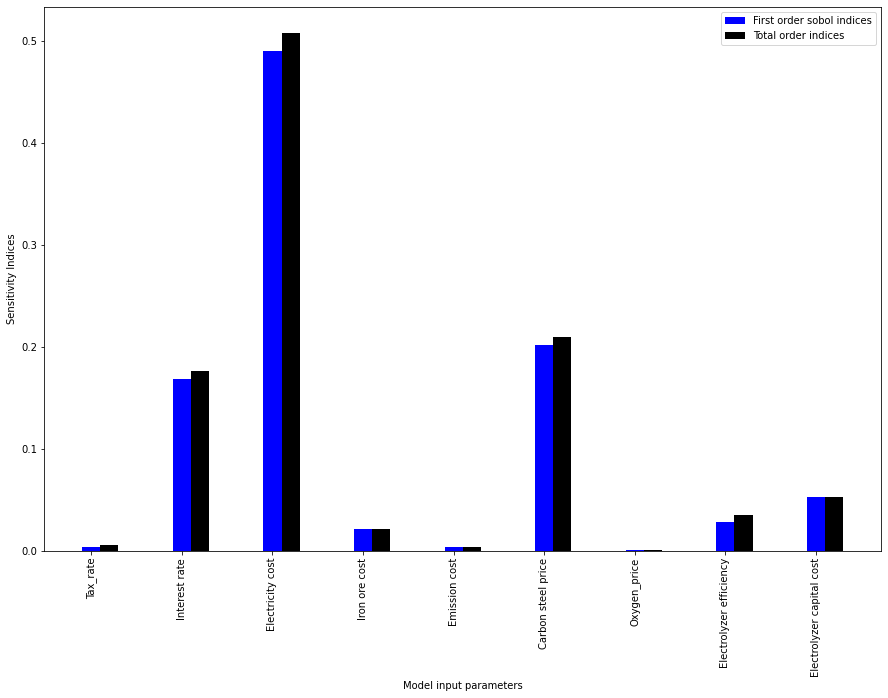

In [14]:
#df_results.plot.bar(x='Parameters',y=['S1', 'ST'],figsize=(15,15))
fig=plt.subplots(figsize=(15,10))
Labels=df_results['Parameters']
y_pos=np.arange(len(Labels))
#y_pos=df_results_irr['Parameters']
plt.bar(y_pos + 0,df_results['S1'],width=0.2,color='blue',label='First order sobol indices',alpha=1)
plt.bar(y_pos + 0.2,df_results['ST'],width=0.2,color='black',label='Total order indices',alpha=1)
plt.xticks(y_pos, Labels,rotation='vertical')
plt.ylabel('Sensitivity Indices')
plt.xlabel('Model input parameters')
plt.legend(loc='best')

In [15]:

df_second_sobol=pd.DataFrame(s2)
df_second_sobol['Parameters']=['Tax_rate', 'Interest rate', 'Electricity cost','Iron ore cost',
            'Emission cost','Carbon steel price','Oxygen_price','Electrolyzer efficiency',
                          'Electrolyzer capital cost']
df_second_sobol.columns=['Tax_rate', 'Interest rate', 'Electricity cost','Iron ore cost',
            'Emission cost','Carbon steel price','Oxygen_price','Electrolyzer efficiency',
                          'Electrolyzer capital cost','Parameters']



In [16]:
Z=np.array([electrolyser_npv(*param_values[i][:])[1] for i in range(len(param_values))])





/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:204: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:205: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).


In [17]:
# Perform analysis
irr = sobol.analyze(problem, Z)
#print_to_console=True
# Returns a dictionary with keys 'S1', 'S1_conf', 'ST', and 'ST_conf'
# (first and total-order indices with bootstrap confidence intervals


In [18]:
s2=irr['S2']
S2_conf=irr['S2_conf']

In [19]:
irr_sensitivity_results=irr
del irr_sensitivity_results['S2_conf']
del irr_sensitivity_results['S2']

In [20]:
df_results_irr=pd.DataFrame.from_dict(irr_sensitivity_results)

In [21]:

df_results_irr['Parameters']=['Tax_rate', 'Interest rate', 'Electricity cost','Iron ore cost',
            'Emission cost','Carbon steel price','Oxygen_price','Electrolyzer efficiency',
                          'Electrolyzer capital cost']


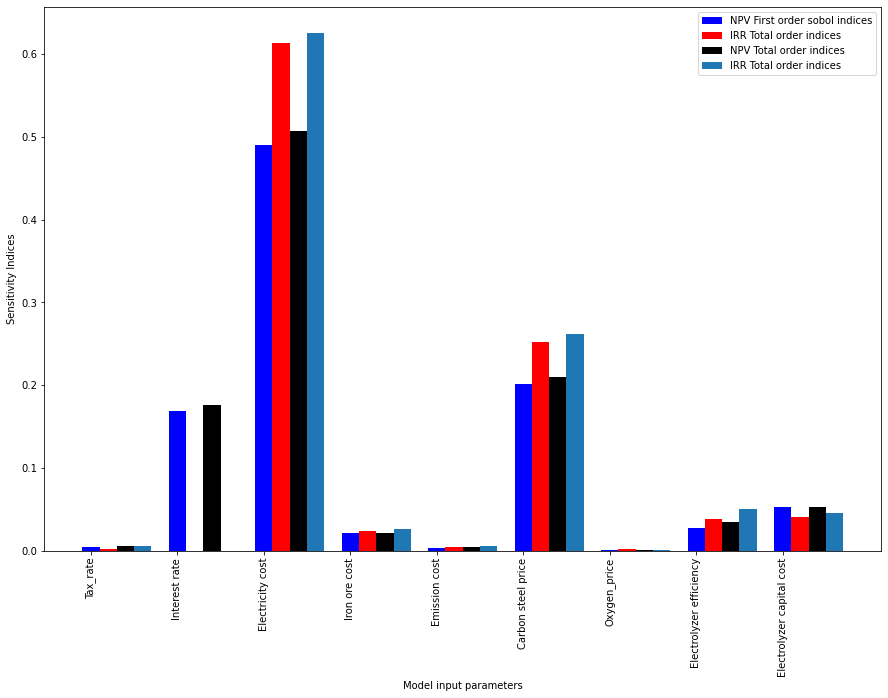

In [22]:
#df_results.plot.bar(x='Parameters',y=['S1', 'ST'],figsize=(15,15))
fig=plt.subplots(figsize=(15,10))
Labels=df_results_irr['Parameters']
y_pos=np.arange(len(Labels))
#y_pos=df_results_irr['Parameters']
plt.bar(y_pos + 0,df_results['S1'],width=0.2,color='blue',label='NPV First order sobol indices',alpha=1)
plt.bar(y_pos + 0.2,df_results_irr['S1'],width=0.2,color='red',label='IRR Total order indices',alpha=1)
plt.bar(y_pos + 0.4,df_results['ST'],width=0.2,color='black',label='NPV Total order indices',alpha=1)
plt.bar(y_pos + 0.6,df_results_irr['ST'],width=0.2,label='IRR Total order indices',alpha=1)
plt.xticks(y_pos, Labels,rotation='vertical')
plt.ylabel('Sensitivity Indices')
plt.xlabel('Model input parameters')
plt.legend(loc='best')

plt.savefig('Global_sensitivity_hdri_elec.pdf',dpi=1200)

In [44]:
###Local sensitivity analysis


## Generation of input variables for one at a time sensitivity analysis


plant_life=20 # years 
tax_rate=0.25 # percentage
interest_rate=0.10 # percentage

electricity_cost=56.12 #USD/MWh # Germany
iron_ore_cost=90 #usd/ton
emission_cost=30# USD 30 per ton 
carbon_steel_price=700#USD/ton

emission_factor=0.413# corresponsding to german emission factor
carbon_price=200
O2_price=40 #USD/ton
el_spec=50 # KWh/kgh2
h2_investment_2020=0.6 # Million euros/MWh2 
# Assume that 60% of the carbon produced could be sold




In [47]:
baseline=[tax_rate,interest_rate, electricity_cost,iron_ore_cost,
            emission_cost,carbon_steel_price,O2_price,el_spec,
                         h2_investment_2020]
baseline_npv=electrolyser_npv(*baseline)[0]
baseline_irr=electrolyser_npv(*baseline)[1]
baseline_npv

/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:204: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:205: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).


-734.0886536138889

In [45]:
variation=np.arange(-20,21,5)


p=[1+(i/100) for i in variation] # P varies from -1.20 to 1.20
change=[x*100 for x in p]

tax_rate_n=[tax_rate*x for x in p] # 35% tax rate has been assumed
interest_rate_n=[interest_rate*x for x in p] # Interest rate of 10%
iron_ore_cost_n=[iron_ore_cost*x for x in p] #USD/ton
#steel_prod_yr_n=[steel_prod_yr*p) # plant capacity of 2.5 Mt/year
electricity_cost_n=[electricity_cost*x for x in p]#usd/MWh
#emission_factor_n=[emission_factor*p)
emission_cost_n=[emission_cost*x for x in p] #usd/ton
carbon_steel_price_n=[carbon_steel_price*x for x in p] #usd/ton

O2_price_n=[O2_price*x for x in p]
el_spec_n=[el_spec*x for x in p]
h_invest_n=[h2_investment_2020*x for x in p]

/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:204: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:205: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).


-734.0886536138889

In [26]:
#Tax_rate is varied 
tax_rate_s=[electrolyser_npv(tax_rate_n[i],interest_rate,electricity_cost,
             iron_ore_cost,emission_cost,carbon_steel_price,O2_price,el_spec,h2_investment_2020) 
            for i in range(len(tax_rate_n))][0]
#Interest rate is varied
interest_rate_s=[(electrolyser_npv(tax_rate,interest_rate_n[i],electricity_cost,
             iron_ore_cost,emission_cost,carbon_steel_price,O2_price,el_spec,h2_investment_2020))
                 for i in range(len(tax_rate_n))][0]

iron_ore_cost_s=[(electrolyser_npv(tax_rate,interest_rate,electricity_cost_n[i],
             iron_ore_cost,emission_cost,carbon_steel_price,O2_price,el_spec,h2_investment_2020))
                 for i in range(len(tax_rate_n))][0]


electricity_cost_s=[(electrolyser_npv(tax_rate,interest_rate,electricity_cost,
             iron_ore_cost_n[i],emission_cost,carbon_steel_price,O2_price,el_spec,h2_investment_2020))
                    for i in range(len(tax_rate_n))][0]              
                 
# Emission prices are varied              
emission_cost_s=[electrolyser_npv(tax_rate,interest_rate,electricity_cost,
             iron_ore_cost,emission_cost_n[i],carbon_steel_price,O2_price,el_spec,h2_investment_2020)
                 for i in range(len(tax_rate_n))][0] #usd/ton

carbon_steel_price_s=[(electrolyser_npv(tax_rate,interest_rate,electricity_cost,
             iron_ore_cost,emission_cost,carbon_steel_price_n[i],O2_price,el_spec,h2_investment_2020))
                      for i in range(len(tax_rate_n))][0] #usd/t


O2_price_s=[(electrolyser_npv(tax_rate,interest_rate,electricity_cost,
             iron_ore_cost,emission_cost,carbon_steel_price,O2_price_n[i],el_spec,h2_investment_2020))
                for i in range(len(tax_rate_n))][0]#u



el_spec_s=[(electrolyser_npv(tax_rate,interest_rate,electricity_cost,
             iron_ore_cost,emission_cost,carbon_steel_price,O2_price_n,el_spec_n[i],h2_investment_2020))
            for i in range(len(tax_rate_n))][0] #u

h_invest_s=[electrolyser_npv(electrolyser_npv(tax_rate,interest_rate,electricity_cost,
             iron_ore_cost,emission_cost,carbon_steel_price,O2_price_n,el_spec,h2_investment_2020_n[i]))
            for i in range(len(tax_rate_n))][0]




/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:204: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
/home/abhinav/[/home/abhinav/anaconda_new]/lib/python3.7/site-packages/ipykernel_launcher.py:205: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).


TypeError: can't multiply sequence by non-int of type 'float'